## Validate Data Completeness for Critical Fields

**Description**: In `transaction_data.csv` , calculate the missing percentage of critical fields: "transaction_id", "amount", and "date", and visualize them.

📁 Loaded existing dataset: transaction_data.csv

🔍 Missing Value Percentage by Field:
transaction_id    14.0
amount            12.0
date              16.0
dtype: float64


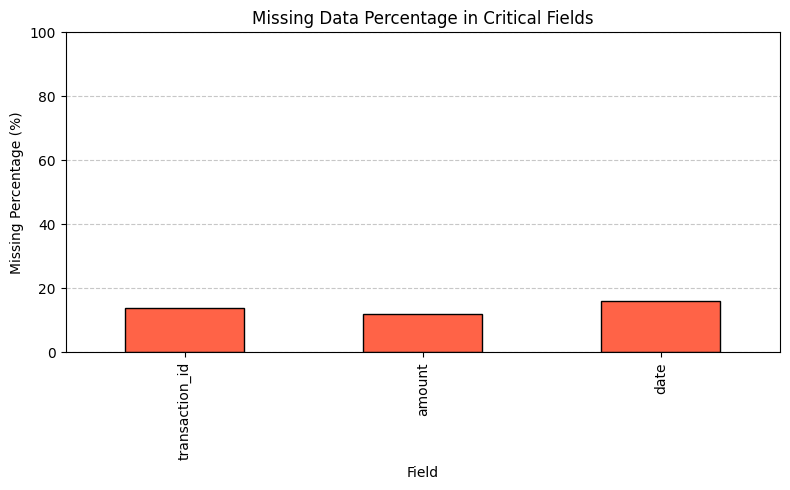

In [3]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Create Sample Dataset if it doesn't exist
filename = "transaction_data.csv"

if not os.path.exists(filename):
    np.random.seed(0)
    data = {
        "transaction_id": [f"T{i}" if i % 7 != 0 else np.nan for i in range(1, 51)],
        "amount": [round(np.random.uniform(10, 500), 2) if i % 8 != 0 else np.nan for i in range(1, 51)],
        "date": [f"2023-09-{(i % 30) + 1:02d}" if i % 6 != 0 else np.nan for i in range(1, 51)],
        "customer_id": [f"C{i}" for i in range(1, 51)]
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"✅ Created sample dataset: {filename}")
else:
    df = pd.read_csv(filename)
    print(f"📁 Loaded existing dataset: {filename}")

# Step 2: Define critical fields
critical_fields = ["transaction_id", "amount", "date"]

# Step 3: Calculate missing percentages
missing_percent = df[critical_fields].isnull().mean() * 100
print("\n🔍 Missing Value Percentage by Field:")
print(missing_percent)

# Step 4: Visualization
plt.figure(figsize=(8, 5))
missing_percent.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Missing Data Percentage in Critical Fields")
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Field")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
